# Импульсный отклик линейной системы
Импульсная переходная функция - это выходной сигнал динамической системы как реакция на входной сигнал. Выходной сигнал может быть получен как свертка входного сигнала и некоей дельта-функции. Входной сигнал чаще всего представляет собой импульс минимальной ширины (часто равный периоду дискретизации), и в выходной сигнал на каждый импульс входного требуется реагировать с помощью дельта функции.  
  
Для начала настроим среду и импортируем нужные модули

In [1]:
import sys
sys.path.append(r'C:\Users\Kell\PycharmProjects\ExpData')

%matplotlib inline

import grapher
import analysis

Далее зададим характеристики входного сигнала. Частота дискретизаци (\delta T) будет равна 0.005, а количество замеров будет равно 1000

In [2]:
deltaT = 0.005
N = 1000

Далее зададим функцию свертки, т.е. ту, которая будет реагировать на каждый входящий сигнал.  
Пусть это будет функция, имитирующая удар сердца в течение 1 секунды, реализация приведена в соотвествующем модуле.
Зададим длительность сигнала, затем зададим саму функцию на интервале указанной длительности, а также нормализуем значения функции, чтобы привести ее к единичным значениям амплитуды.

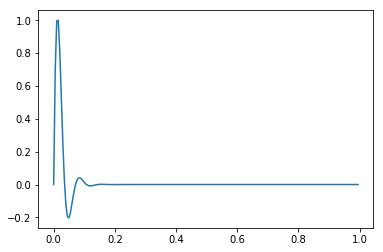

In [3]:
M = 200
h = analysis.examples.heartbeat(deltaT)
h_values = [h(t) for t in range(M)]
analysis.preprocessing.normalize_max(h_values)

# Отображаем наше сердцебиение
grapher.init(1)
grapher.set_subplot(1, x_arr=[i * deltaT for i in range(M)], y_arr=h_values,
                    subplot_y_number=1, subplot_x_number=1)
grapher.show()

Имитируем значения, полученные с кардиографа.

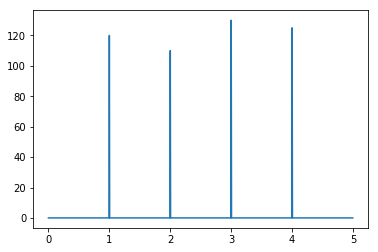

In [4]:
x_values = [0] * N
x_values[200] = 120
x_values[400] = 110
x_values[600] = 130
x_values[800] = 125

grapher.set_subplot(1, x_arr=[i * deltaT for i in range(N)], y_arr=x_values,
                    subplot_y_number=1, subplot_x_number=1)
grapher.show()

Теперь применим дельта-функцию к значениям кардиографа и получим итоговый график сердцебиения.

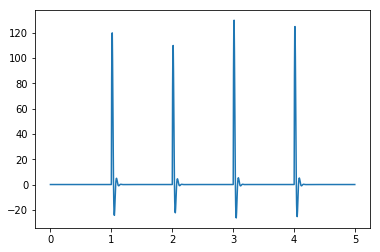

In [5]:
values = analysis.impulse_response.process(x_values, h_values)
values = values[:N]

grapher.set_subplot(1, x_arr=[i * deltaT for i in range(N)], y_arr=values,
                    subplot_y_number=1, subplot_x_number=1)
grapher.show()